In [1]:
import pandas as pd    # For data manipulation
import numpy as np     # For numerical operations
import matplotlib.pyplot as plt  # For numerical operations
import seaborn as sns   # For statistical plots
import warnings
import pymysql 
from sqlalchemy import create_engine  # For database connection
from scipy.stats import ttest_ind  #For _hypotests
from scipy import stats   # For statistical tests
warnings.filterwarnings('ignore')   # To suppress warnings

In [2]:
# MySQL connection details
username = 'root'
password = 'Raisha789'
host = 'localhost'
port = 3306
database = 'vendor'

# Create engine (live connection)
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')
conn = engine.connect()

In [3]:
#fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


# Exploratory Data Analysis
- Previously, we examined the various tables in the database to identity key variables, understand their relationships , and determine which one should be included in final analysis

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns identify anomalies and ensure data quality before procedding for further analysis

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10514.0,10600.166255,18661.457769,2.000000,3924.000000,7153.000000,9552.000000,2.013590e+05
Brand,10514.0,17975.340784,12689.342924,58.000000,5716.750000,18644.000000,25465.750000,9.063100e+04
PurchasePrice,10514.0,23.409368,92.170052,0.360000,6.840000,10.450000,19.370000,4.264700e+03
ActualPrice,10514.0,34.340224,126.674964,0.490000,10.990000,15.990000,28.990000,5.799990e+03
Volume,10514.0,847.736732,667.959671,50.000000,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10514.0,3192.852007,11181.338139,1.000000,36.000000,280.500000,2028.750000,3.376600e+05
TotalPurchaseDollars,10514.0,30589.555058,124047.851341,0.710000,479.362500,3836.415000,21280.710000,3.811252e+06
TotalSalesQuantity,10514.0,3129.583317,11037.801407,1.000000,36.000000,280.000000,1985.000000,3.349390e+05
TotalSalesDollars,10514.0,42954.173834,168977.755843,1.980000,809.820000,5599.700000,29524.250000,5.101920e+06
TotalSalesPrice,10514.0,19111.958773,45264.605387,0.990000,334.890000,3020.085000,16442.477500,6.728193e+05


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10514.0,10600.166255,18661.457769,2.000000,3924.000000,7153.000000,9552.000000,2.013590e+05
Brand,10514.0,17975.340784,12689.342924,58.000000,5716.750000,18644.000000,25465.750000,9.063100e+04
PurchasePrice,10514.0,23.409368,92.170052,0.360000,6.840000,10.450000,19.370000,4.264700e+03
ActualPrice,10514.0,34.340224,126.674964,0.490000,10.990000,15.990000,28.990000,5.799990e+03
Volume,10514.0,847.736732,667.959671,50.000000,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10514.0,3192.852007,11181.338139,1.000000,36.000000,280.500000,2028.750000,3.376600e+05
TotalPurchaseDollars,10514.0,30589.555058,124047.851341,0.710000,479.362500,3836.415000,21280.710000,3.811252e+06
TotalSalesQuantity,10514.0,3129.583317,11037.801407,1.000000,36.000000,280.000000,1985.000000,3.349390e+05
TotalSalesDollars,10514.0,42954.173834,168977.755843,1.980000,809.820000,5599.700000,29524.250000,5.101920e+06
TotalSalesPrice,10514.0,19111.958773,45264.605387,0.990000,334.890000,3020.085000,16442.477500,6.728193e+05


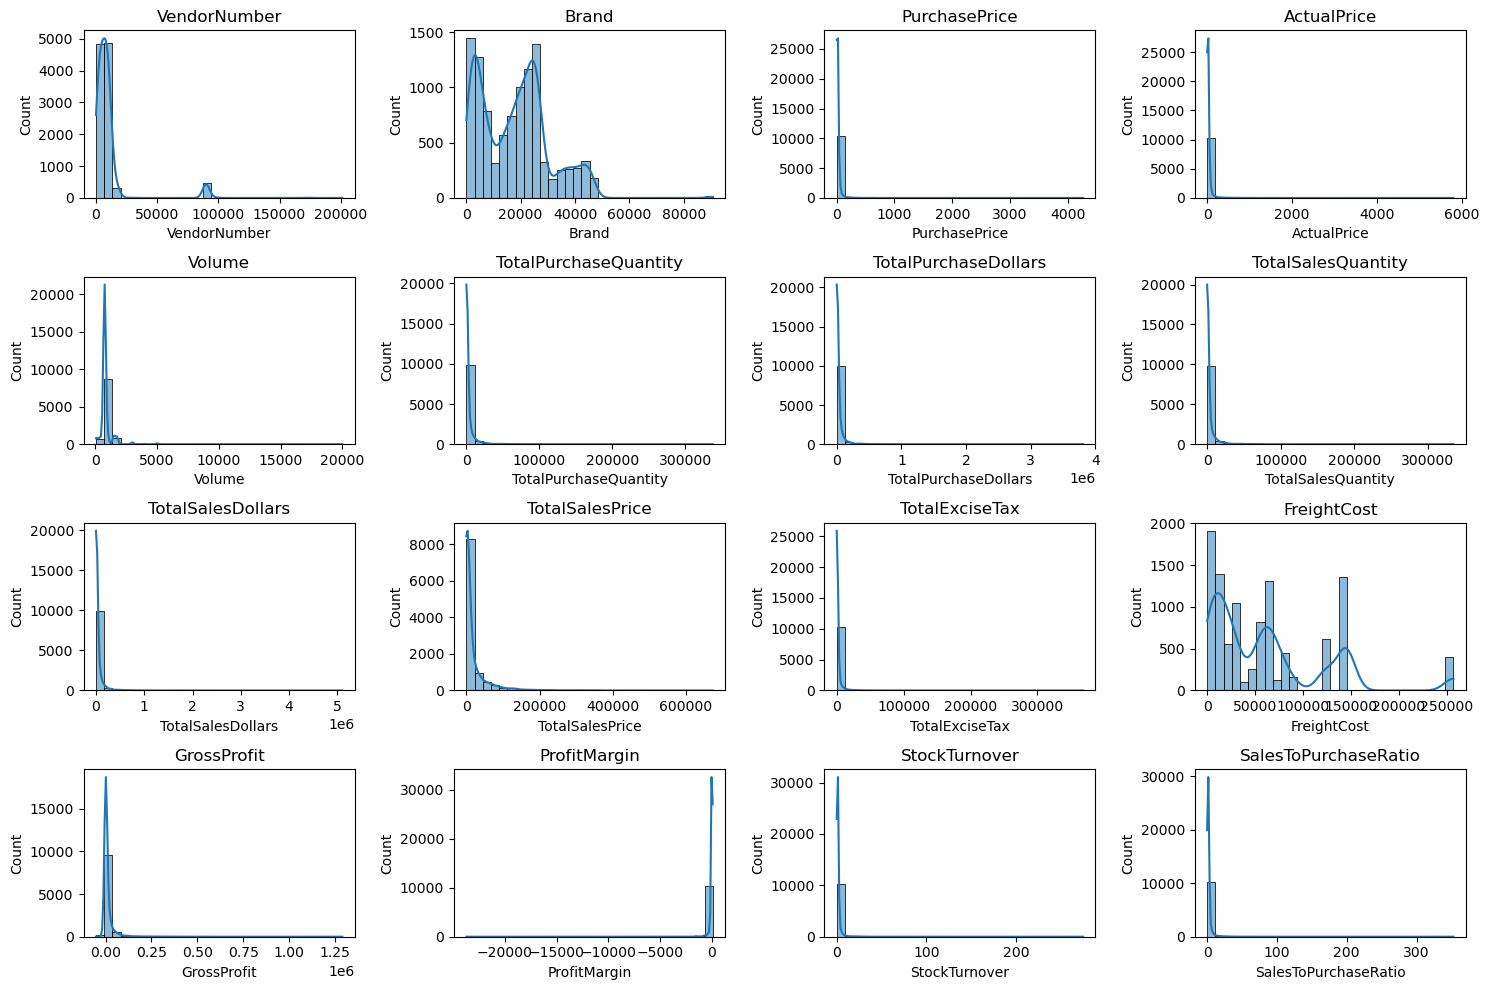

In [6]:
# distribution PLots for numerical columns
numericals_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for  i,col in enumerate(numericals_cols):
    plt.subplot(4,4,i+1) # Adjust grid layout as needed
    sns.histplot(df[col],kde = True,bins= 30)
    plt.title(col)
plt.tight_layout()
plt.show()

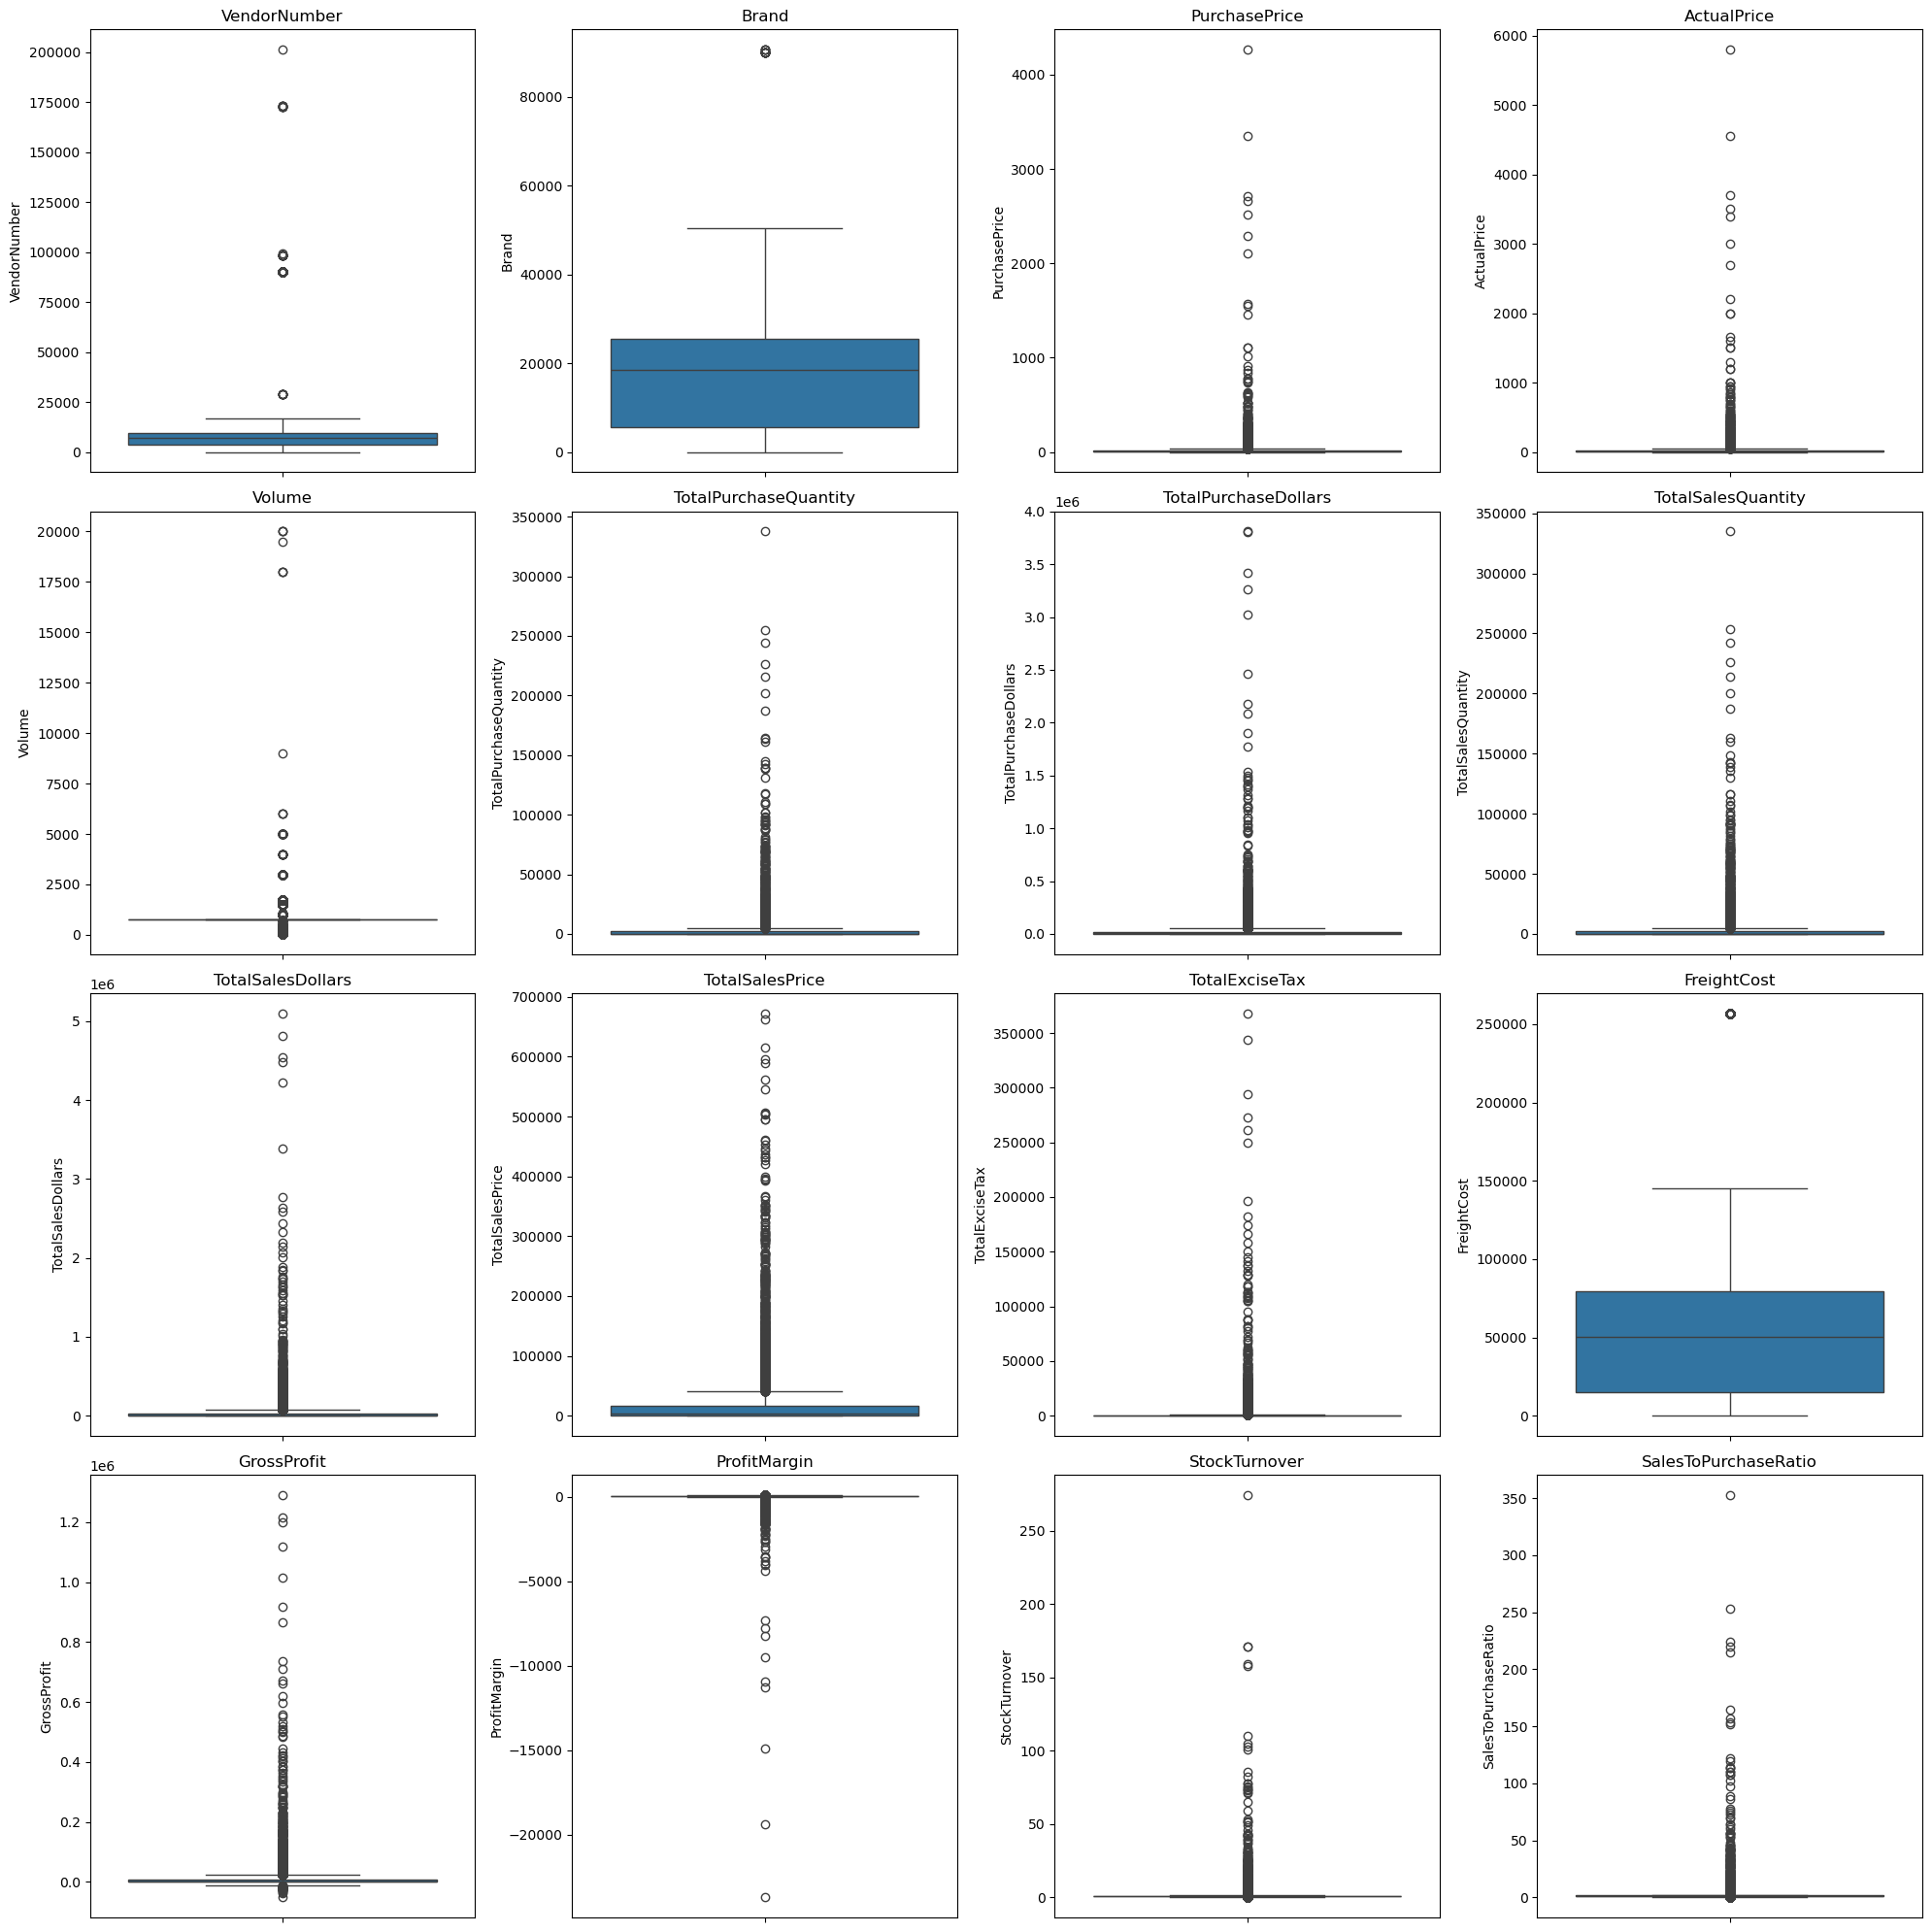

In [7]:
# outlier Detection with Boxplots
plt.figure(figsize=(20,20))
for i, col in enumerate(numericals_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#  Descriptive Statistics Summary

__High Skewness & Outliers__ 
 - Variables such as Purchase Quantity, Purchase Dollars, Sales Dollars, and Prices show high right-skewness.
 - A few extremely high values (outliers) significantly inflate the mean, making the median a more reliable indicator of typical behavior.
 - These outliers could be bulk orders, premium-priced items, or data entry issues, and should be reviewed separately.

__Low Sales Activity__
 - A large number of records show zero sales quantity and zero sales revenue.
 - Indicates slow-moving, obsolete, or unmarketed inventory — products that were purchased but never sold.
 - Calls for further action in stock clearance, marketing, or inventory rationalization

__Profitability Issues__
 - Negative gross profit and low or negative profit margins in several records highlight that many items or vendors are not profitable
 - This may be due to high purchase cost, high freight, or poor pricing strategies.
 - Suggests a need to reassess vendor terms, selling prices, or purchase planning.

__ Purchase Quantity__
 - Suggests inconsistent purchasing behavior or fluctuating unit sizes/weights per transaction.

__Freight Costs__
 -Consistently high freight costs are observed across most transactions.
 -Consider evaluating vendors with lower freight charges or freight cost per unit.

 __Stock Turnover & Sales Ratios__
  - Both Stock Turnover Ratio and Sales-to-Purchase Ratio are low on average.
  - products sell extremely fast while others remain in stock indefinitely
  - Suggests a need to optimize purchasing, analyze demand patterns, and promote faster-selling items.

In [8]:
df = pd.read_sql_query("""SELECT * From vendor_sales_Summary
where GrossProfit > 0
And ProfitMargin > 0
And TotalSalesQuantity > 0""",conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8565.0,10107.041331,17634.685420,2.000000e+00,3664.000000,7153.000000,9552.000000,2.013590e+05
Brand,8565.0,17614.046468,12945.503736,5.800000e+01,5376.000000,17601.000000,24935.000000,9.063100e+04
PurchasePrice,8565.0,21.779365,81.185007,3.600000e-01,6.660000,10.060000,17.850000,3.352930e+03
ActualPrice,8565.0,32.295213,112.414374,4.900000e-01,9.990000,14.990000,25.990000,4.559990e+03
Volume,8565.0,864.406480,724.230365,5.000000e+01,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,8565.0,3771.571395,12276.310633,1.000000e+00,42.000000,431.000000,2666.000000,3.376600e+05
TotalPurchaseDollars,8565.0,35883.087602,136715.560071,7.100000e-01,545.490000,5017.200000,26600.610000,3.811252e+06
TotalSalesQuantity,8565.0,3748.547577,12125.055208,1.000000e+00,62.000000,490.000000,2675.000000,3.349390e+05
TotalSalesDollars,8565.0,51536.284564,186061.452634,1.980000e+00,1349.850000,8482.220000,40613.050000,5.101920e+06
TotalSalesPrice,8565.0,22756.625624,49303.003032,9.900000e-01,584.610000,4549.650000,22595.120000,6.728193e+05


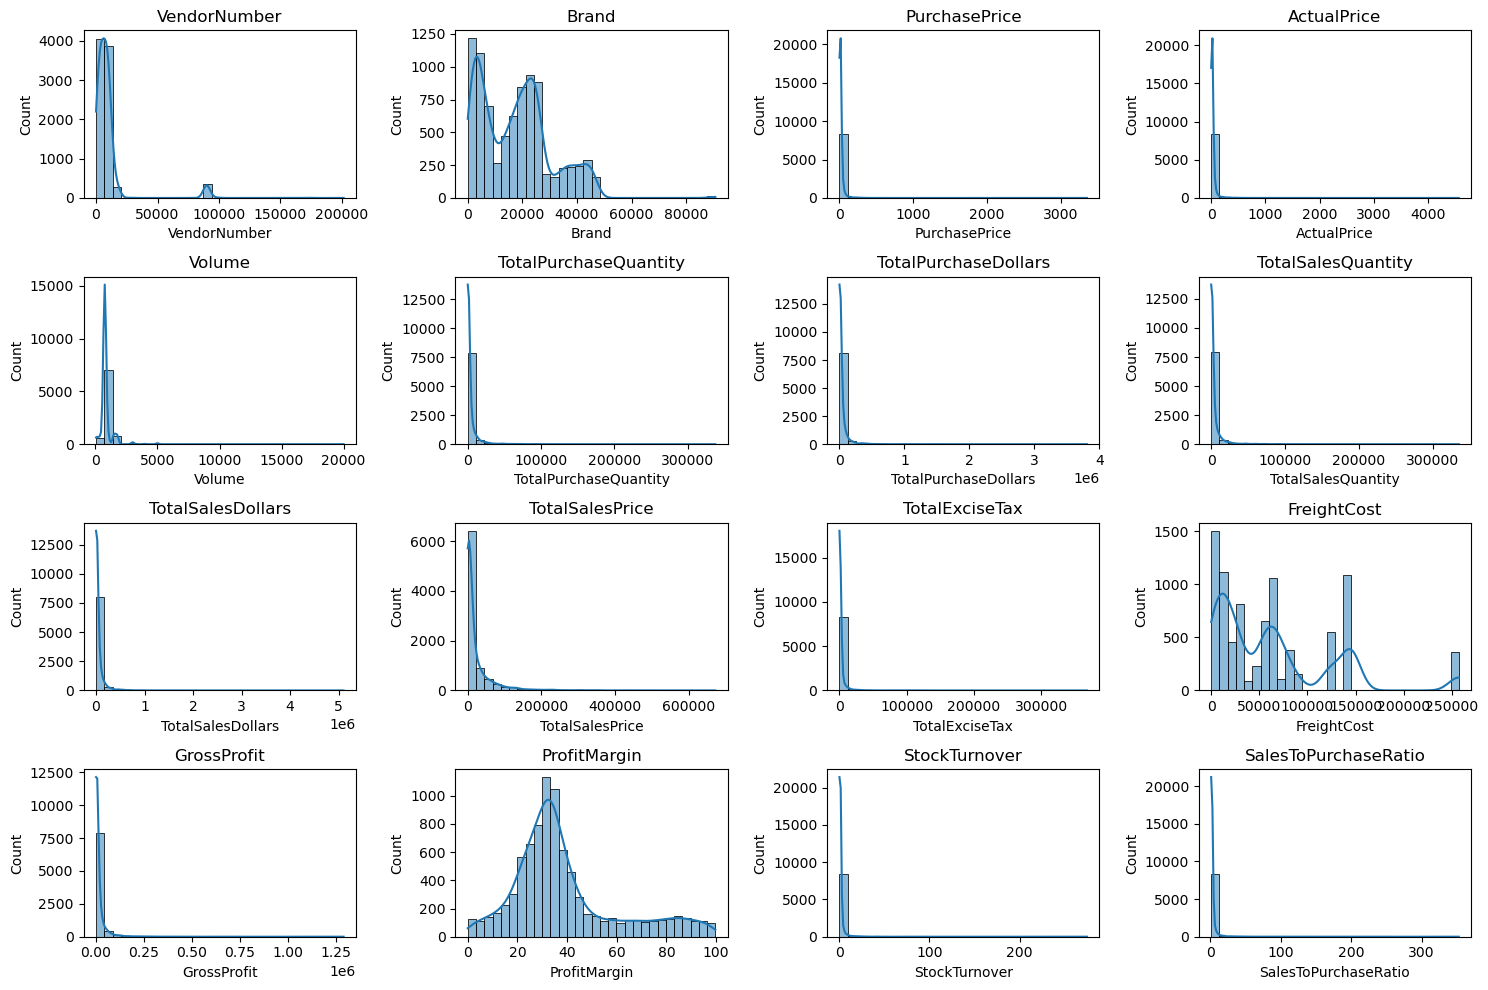

In [10]:
# distribution PLots for numerical columns
numericals_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for  i,col in enumerate(numericals_cols):
    plt.subplot(4,4,i+1) # Adjust grid layout as needed
    sns.histplot(df[col],kde = True,bins= 30)
    plt.title(col)
plt.tight_layout()
plt.show()

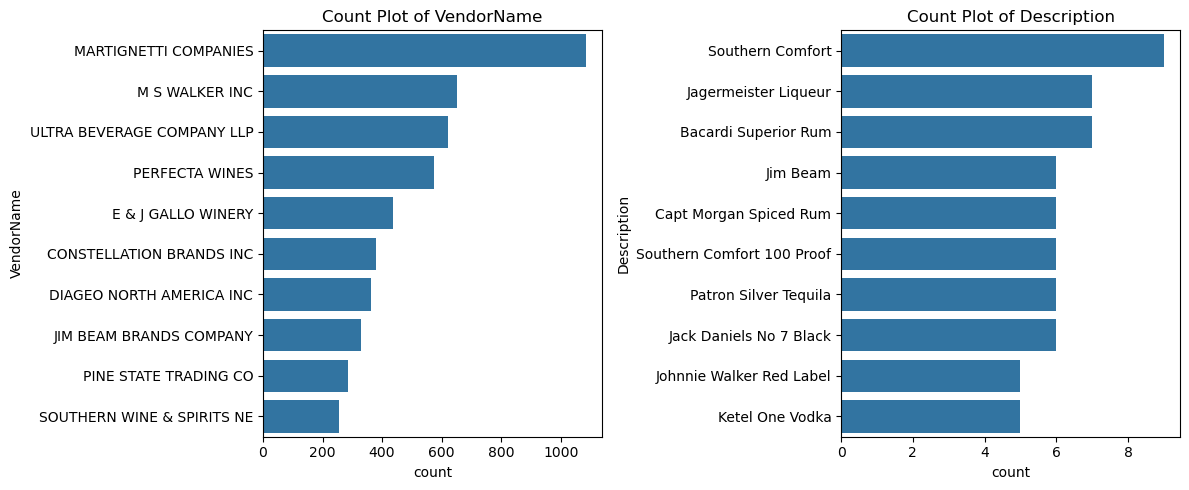

In [11]:
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i + 1)  # use subplot instead of subplots
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")

plt.tight_layout()
plt.show()

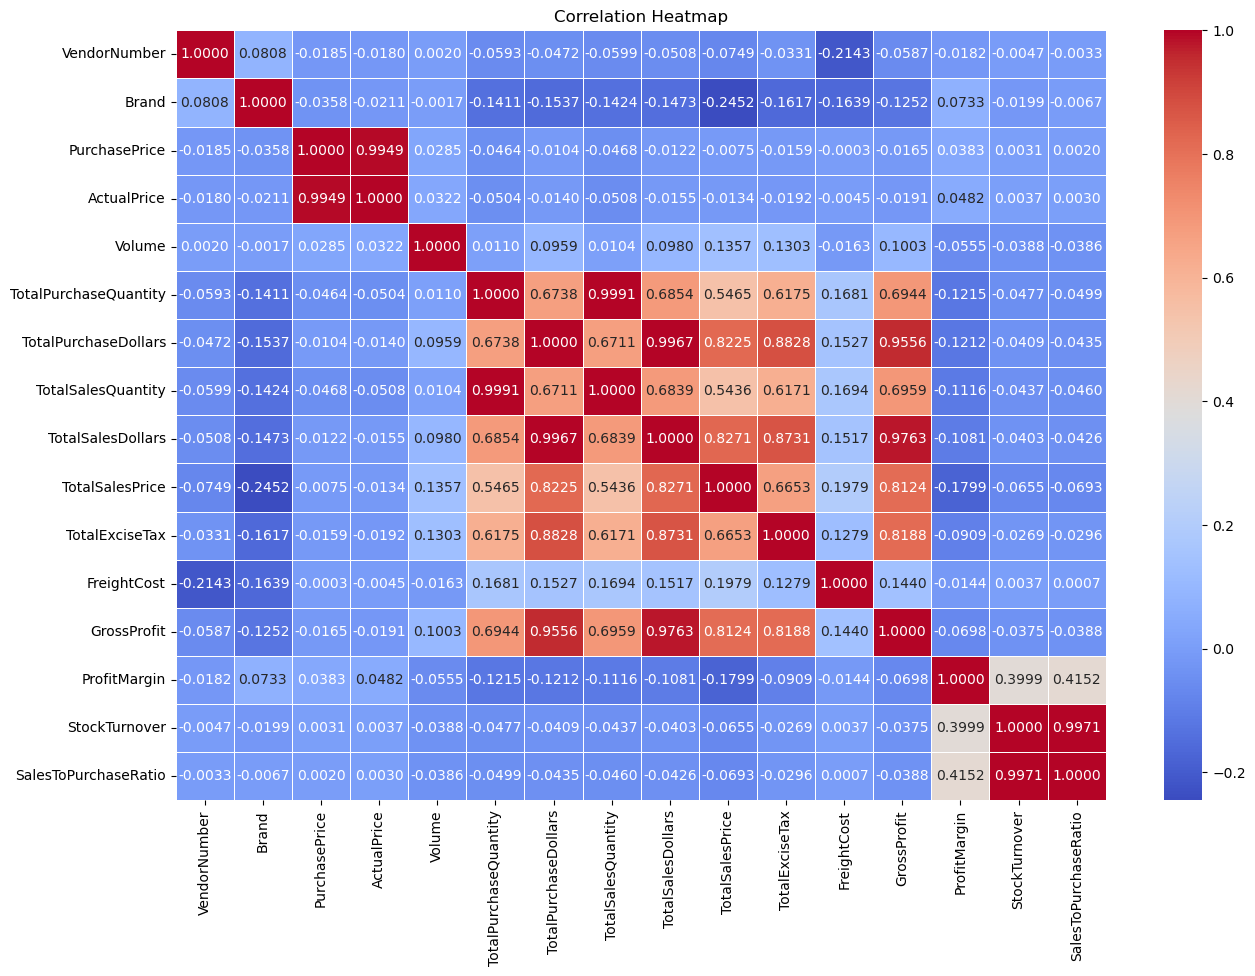

In [12]:
# Correlation Heatmap
plt.figure(figsize=(15,10))
correlation_matrix = df[numericals_cols].corr()
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".4f",              
    cmap="coolwarm", 
    linewidths=0.5          
)
plt.title("Correlation Heatmap")
plt.show()


 # Correlation Insights

 - The correlation between purchase price and total sales order is 0.0667, indicating a very weak positive relationship; purchase price has almost no effect on sales order quantity.
 - The correlation between purchase price and gross profit is -0.0410, a very weak negative relationship, showing no meaningful connection between purchase price and gross profit.
 - Purchase quantity and sales quantity have a strong positive correlation of 0.8390, meaning as purchase quantity increases, sales quantity also increases significantly, indicating good alignment between buying and selling.
 - The correlation between profit margin and sales price is 0.1029, a weak positive relationship, suggesting only a slight tendency for higher sales prices to be associated with better profit margins.
 - The correlation between profit margin and sales price is 0.1029, a weak positive relationship, suggesting only a slight tendency for higher sales prices to be associated with better profit margins.
 - Stock turnover and gross profit have a weak to moderate positive correlation of 0.2550, indicating faster inventory movement is somewhat related to higher gross profit.
 - stock turnover and profit margin are strongly positively correlated at 0.8075, meaning efficient stock turnover strongly supports better profit margins.
   

# DATA ANALYSIS
   Identify Brands that needs Promotional or Pricing Adjustments which Exhibits lower sales Performance but higher profit margins.

In [13]:
brand_performance = df.groupby('Description').agg({
'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [46]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [47]:
low_sales_threshold

np.float64(560.299)

In [48]:
high_margin_threshold

np.float64(64.97017552750111)

In [52]:
# Filter Brands with Low Sales but high Profit Margins
target_brands = brand_performance[
 ( brand_performance['TotalSalesDollars'] <= low_sales_threshold) & 
 ( brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


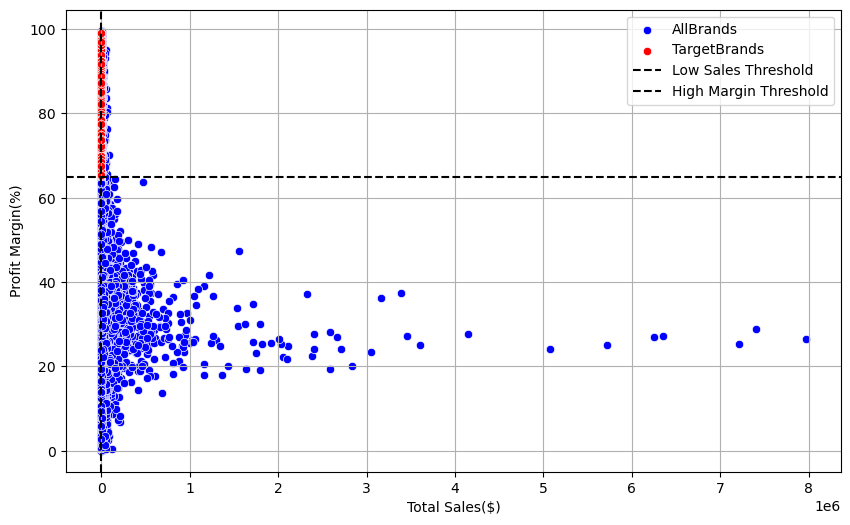

In [61]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = brand_performance , x = 'TotalSalesDollars' , y = 'ProfitMargin' , color = 'blue' ,label = 'AllBrands' )
sns.scatterplot(data = target_brands , x = 'TotalSalesDollars' , y = 'ProfitMargin' , color = 'red' ,label = 'TargetBrands' )

plt.axvline(low_sales_threshold , linestyle = '--' , color = 'black', label = 'Low Sales Threshold')
plt.axhline(high_margin_threshold , linestyle = '--' , color = 'black', label = 'High Margin Threshold')

plt.xlabel('Total Sales($)')
plt.ylabel('Profit Margin(%)')
plt.legend()
plt.grid(True)
plt.show()

which vendors and brands demonstrate the highest sales performance?

In [55]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return f"{value:.2f}"

In [56]:
# Top Vendors & Brands by sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.933036e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: TotalSalesDollars, dtype: float64

In [57]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

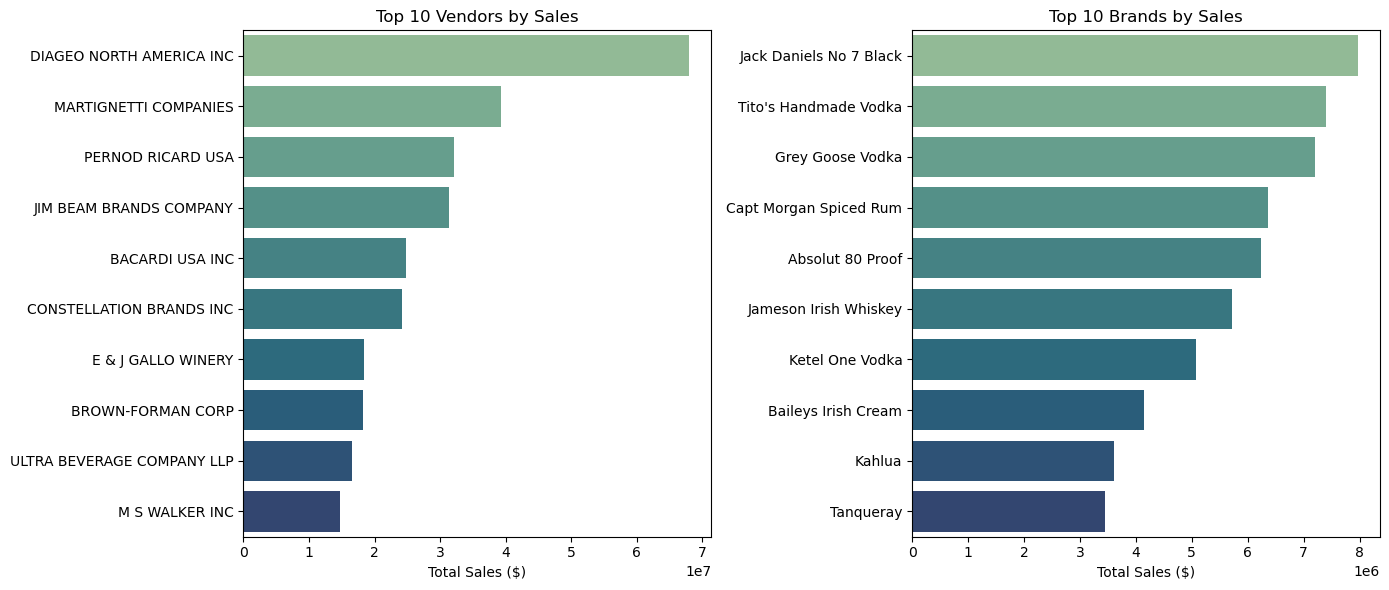

In [21]:
# List of tuples: (DataFrame, column name for y-axis, plot title)
data_list = [
    (top_vendors, "VendorName", "Top 10 Vendors by Sales"),
    (top_brands, "Description", "Top 10 Brands by Sales")
]

plt.figure(figsize=(14, 6))

for i, (data, y_col, title) in enumerate(data_list):
    plt.subplot(1, 2, i + 1)
    sns.barplot(data=data, y=y_col, x="TotalSalesDollars", palette="crest")
    plt.title(title)
    plt.xlabel("Total Sales ($)")
    plt.ylabel("")

plt.tight_layout()
plt.show()

In [22]:
#Which Vendors Contribute the most to total Purchase Dollars?
vendor_performance =df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit' : 'sum',
    'TotalSalesDollars':'sum',
}).reset_index()

In [23]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [24]:
vendor_performance =round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [58]:
# display top 10 vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


In [59]:
top_vendors['PurchaseContribution%'].sum()

np.float64(65.69000000000001)

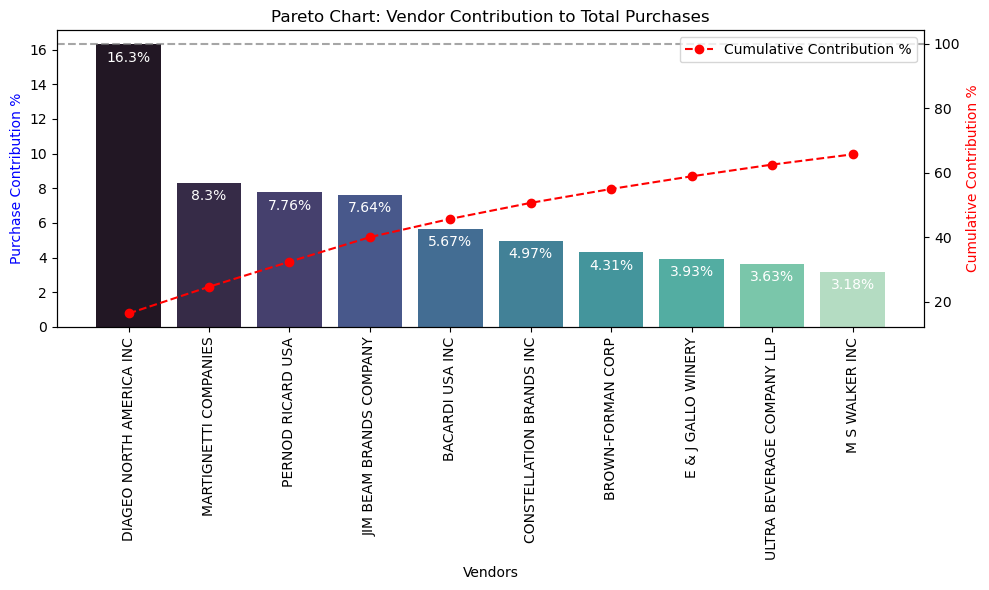

In [27]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution %
sns.barplot(x=top_vendors['VendorName'], 
            y=top_vendors['PurchaseContribution%'], 
            palette="mako", ax=ax1)

# Adding data labels on bars
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')

# Line plot for Cumulative Contribution %
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], 
         top_vendors['Cumulative_Contribution%'], 
         color='red', marker='o', linestyle='dashed', label='Cumulative Contribution %')

# Axis labels and title
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Horizontal line and legend
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# How much of total procurement is depedent on the top vendors?

In [28]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Purchase Contribution of top 10 vendors is 65.69%


In [29]:
# Get top vendor names and their contribution
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)

# Calculate total of the top vendors' contribution
total_contribution = sum(purchase_contributions)

#Compute the rest (other vendors)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors"
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)


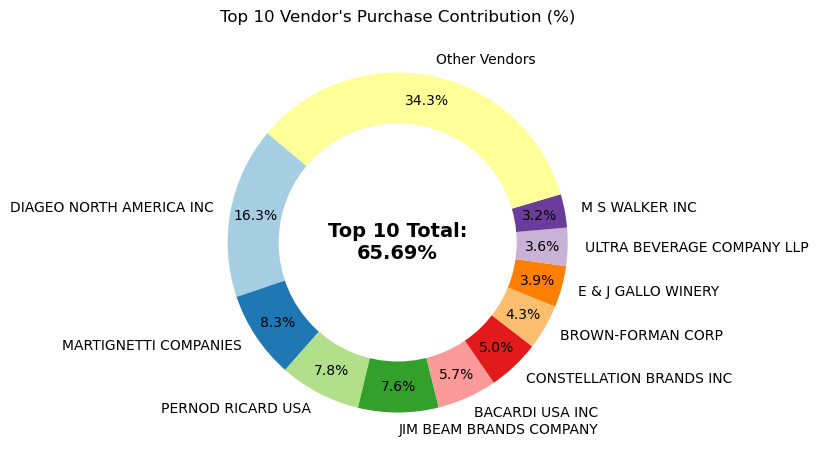

In [30]:
# Donut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw center circle to create donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add total in the center
plt.text(
    0, 0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center'
)

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.tight_layout()
plt.show()

Dose Purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost saving?

In [31]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [32]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"],q =3,labels=["Small","Medium","Large"])

In [33]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8560,Small,2
8561,Small,6
8562,Small,2
8563,Small,1


In [34]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.057543
Medium,15.486414
Large,10.777625


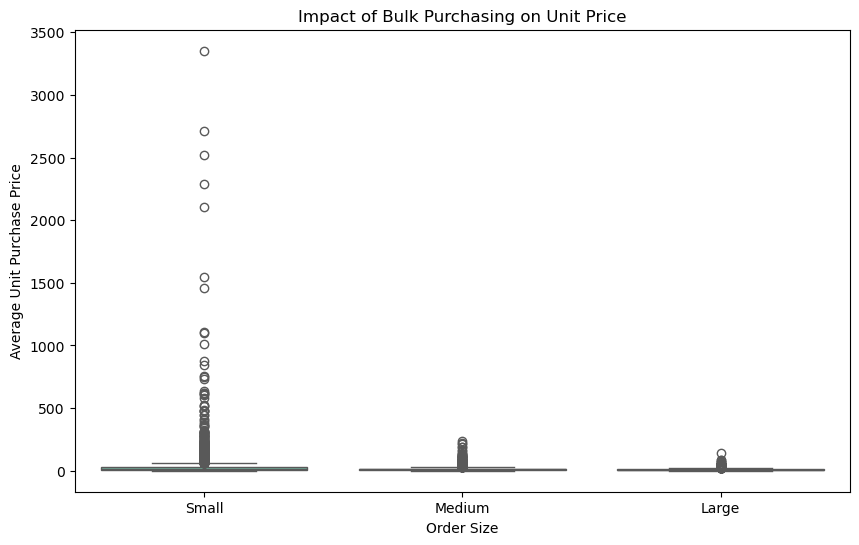

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="OrderSize",y="UnitPurchasePrice",palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

- Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
- The price difference between Small and Large orders is substantial (-72% reduction in unit cost)
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue


In [36]:
#Which Vendors have low inventory turnover, indicating excess stock and slow-moving products?
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


How much capital is locked in unsold inventory per vendor,and which vendors contribute the most to it?


In [37]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', (df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 2708246.4999999995


In [38]:
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['Unsold Inventory Value'] = inventory_value_per_vendor['UnsoldInventoryValue']
top_inventory_vendors = inventory_value_per_vendor.head(10)
top_inventory_vendors = top_inventory_vendors[["VendorName", "Unsold Inventory Value"]]
top_inventory_vendors

,VendorName,Unsold Inventory Value
25,DIAGEO NORTH AMERICA INC,722209.05
46,JIM BEAM BRANDS COMPANY,554665.63
68,PERNOD RICARD USA,470625.61
116,WILLIAM GRANT & SONS INC,401960.83
30,E & J GALLO WINERY,228282.61
79,SAZERAC CO INC,198436.41
11,BROWN-FORMAN CORP,177733.74
20,CONSTELLATION BRANDS INC,133617.62
61,MOET HENNESSY USA INC,126477.70
77,REMY COINTREAU USA INC,118598.15


What is the 95% confidence intervals for profit margins of top-performing and low performing Vendors.

In [39]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [40]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [41]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2142, dtype: float64

In [42]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8560    83.448276
8561    96.436186
8562    25.252525
8563    98.974037
8564    99.166079
Name: ProfitMargin, Length: 2142, dtype: float64

In [43]:
def confidence_interval(data,confidence = 0.95):
    mean_val = np.mean(data)
    std_err = np.std(data,ddof =1)/ np.sqrt(len(data)) # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df = len(data)-1)
    margin_of_error = t_critical * std_err
    return mean_val,mean_val - margin_of_error,mean_val + margin_of_error

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.17
Low Vendors 95% CI: (40.48, 42.62), Mean: 41.55


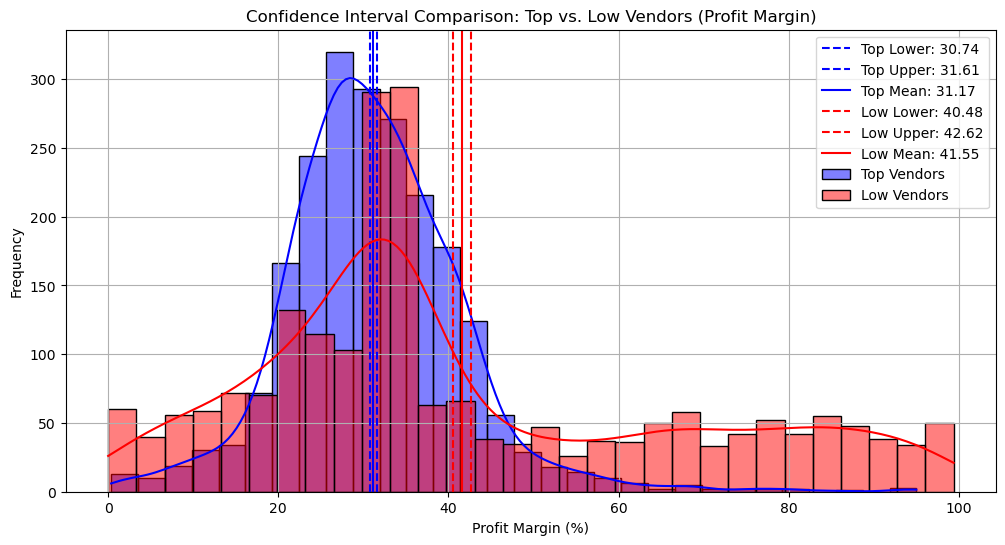

In [44]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

- The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
- I For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

__Is there a significant difference in profit margins between top-performing and low-performing vendors?__
 
 Hypothesis: Ho (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors. H1     (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.


In [62]:
# Define thresholds
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# Subset top and low vendors based on TotalSalesDollars and extract their ProfitMargin
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

T-Statistic: -17.6440, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.
